In [1]:
## LSTM

In [1]:
## Import libraries
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # Specific style for our visuals

In [3]:
## Import the data

df = pd.read_csv('AAPL.csv') 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059410,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925644,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200
...,...,...,...,...,...,...,...
1001,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
1002,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
1003,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
1004,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900


In [5]:
## Setting the date as index
df.set_index('Date',inplace=True)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
## the start date is not Jan-01 because the the it was not recorded due to holiday or something.

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059410,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925644,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [11]:
## get the number of rows and columns in dataset
df.shape

(1006, 6)

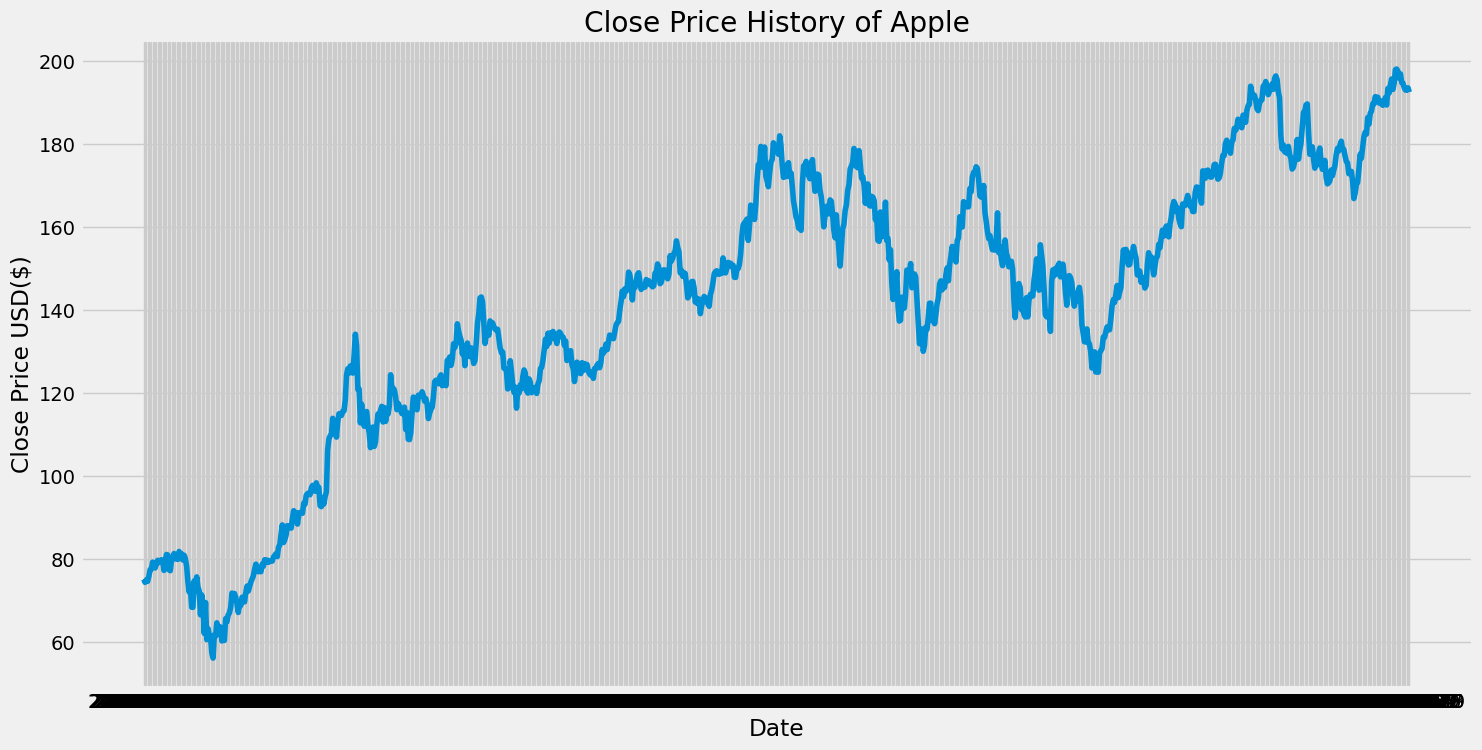

In [13]:
# Visualize the closing price history

plt.figure(figsize=(16,8))
plt.title('Close Price History of Apple')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.show()

In [15]:
# Create a new dataframe with only the close column

data = df.filter(['Close'])

## Convert the dataframe to a numpy array

dataset = data.values

# Get the number of rows to train the model and test the model

training_data_lenght = math.ceil(len(dataset) * 0.8)  
## we want 80% of data for training and the rest for testing, 
## We cannot use train_test_split here because the data is in sequence and the train_test_split shuffles the data.

test_data_length = len(dataset) - training_data_lenght

In [17]:
## Let's check the training dataset length and testing dataset length which is 80% and 20% respectively 


training_data_lenght, test_data_length

(805, 201)

In [19]:
# Scale the data

scaler = MinMaxScaler(feature_range = (0, 1))

In [21]:
## Do it after spliting the data to prevent the data leakage

In [23]:
## Split the dataset according to the length of train and test size

train_data = dataset[0:training_data_lenght,:]

## X_train and y_train 
X_train = []
y_train = []


## Here we are storing the first 60 records into X_train and the only column which is close price
## and 61st record into y_train.
# after each iteration the datasets will get updated means 
# 1. first 0-59 records into X_train -----> 60th record into y_train
# 2. from record 1-60 into X_train(previous value of y_train) -----> 61st record into y_train
# 3. from record 2-61 into X_train(previous value of y_train) -----> 62nd record into y_train
# this steps will go on till the end of training data.
# This is how we are keeping the sequence into both training and testing dataset
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(X_train)
        print(y_train)
        print()

## What you are seeing is the first 60 dataset of X_train and 61st dataset into y_train
## after this iteration next 60 records will get stored into X_train and next record into y_train
## Noticably y_train from the first y_train will get included into next X_train dataset

[array([75.08750153, 74.35749817, 74.94999695, 74.59750366, 75.79750061,
       77.40750122, 77.58249664, 79.23999786, 78.16999817, 77.83499908,
       78.80999756, 79.68250275, 79.14250183, 79.42500305, 79.80750275,
       79.57749939, 77.23750305, 79.42250061, 81.08499908, 80.96749878,
       77.37750244, 77.16500092, 79.71250153, 80.36250305, 81.30249786,
       80.00749969, 80.38749695, 79.90249634, 81.80000305, 81.21749878,
       81.23750305, 79.75      , 80.90499878, 80.07499695, 78.26249695,
       74.54499817, 72.01999664, 73.16249847, 68.37999725, 68.33999634,
       74.70249939, 72.33000183, 75.68499756, 73.23000336, 72.25749969,
       66.54250336, 71.33499908, 68.85749817, 62.05749893, 69.49250031,
       60.55250168, 63.21500015, 61.66749954, 61.19499969, 57.31000137,
       56.09249878, 61.72000122, 61.38000107, 64.61000061, 61.93500137])]
[63.70249938964844]



In [25]:
# Convert the X_train and y_train into numpy array so we can train LSTM 

X_train, y_train = np.array(X_train), np.array(y_train)

In [27]:
# Reshape the X_train becasue LSTM expects a 3D array as an input
# LSTM expects no of samples, no of time steps and no of features

X_train.shape   ## Right now it's two dimensional

(745, 60)

In [29]:
## Now we will reshape the data
## Here 745 is no of rows, 60 is timesteps, 1 is no of features (Close price)
X_train = np.reshape(X_train, (745, 60, 1))
X_train.shape

(745, 60, 1)

In [31]:
## Build the LSTM

#model = Sequential()
##lnput_shape = (60, 1) because 60 is timestamp and 1 feature (Close)
#model.add(Input(shape = (60,1)))
# LSTM with 50 neurons; return_sequence = True becasue we are using another LSTM layer:
#model.add(LSTM(100, return_sequences=True))
#model.add(LSTM(50, return_sequences = False))
#model.add(Dense(25))
#model.add(Dense(1))

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

# Build the LSTM with dropout and regularization
model = Sequential()
model.add(Input(shape=(60, 1)))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.02))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.02))
model.add(Dense(25))
model.add(Dense(1))


# Early stopping callback
#early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [35]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse'])

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,301 (282.43 KB)

 Trainable params: 72,301 (282.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with validation split and early stopping
history = model.fit(X_train, y_train, batch_size=1, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
265/596 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 11575.4678 - mse: 11575.4678

In [369]:
# Create test dataset same as training dataset starting from the 806 hence we are using training_data_lenght - 60 till end

test_data = dataset[training_data_lenght- 60:,:]

## X_train and y_train 
X_test = []
y_test = dataset[training_data_lenght: ,:]  # This is the values we want our model to predict


## Here we are storing the first 60 records into X_train and the only column which is close price
## and 61st record into y_train.
# after each iteration the datasets will get updated means 
# 1. first 0-59 records into X_train -----> 60th record into y_train
# 2. from record 1-60 into X_train(previous value of y_train) -----> 61st record into y_train
# 3. from record 2-61 into X_train(previous value of y_train) -----> 62nd record into y_train
# this steps will go on till the end of training data.
# This is how we are keeping the sequence into both training and testing dataset
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    if i <= 60:
        print(X_test)
        print()


[array([136.5       , 134.50999451, 132.36999512, 132.30000305,
       135.44999695, 132.22999573, 131.86000061, 130.02999878,
       126.04000092, 129.61000061, 129.92999268, 125.06999969,
       126.36000061, 125.01999664, 129.61999512, 130.1499939 ,
       130.72999573, 133.49000549, 133.41000366, 134.75999451,
       135.94000244, 135.21000671, 135.27000427, 137.86999512,
       141.11000061, 142.52999878, 141.86000061, 143.96000671,
       145.92999268, 143.        , 144.28999329, 145.42999268,
       150.82000732, 154.5       , 151.72999573, 154.6499939 ,
       151.91999817, 150.86999512, 151.00999451, 153.8500061 ,
       153.19999695, 155.33000183, 153.71000671, 152.55000305,
       148.47999573, 148.91000366, 149.3999939 , 146.71000671,
       147.91999817, 147.41000366, 145.30999756, 145.91000366,
       151.02999878, 153.83000183, 151.6000061 , 152.86999512,
       150.58999634, 148.5       , 150.47000122, 152.58999634])]



In [371]:
# Convert the data into numpy array
X_test = np.array(X_test)

In [373]:
## Reshape the data

X_test = np.reshape(X_test, (201, 60, 1)) # Same as training 

In [375]:
## Prediction time

predictions = model.predict(X_test)

# To convert into original values (unscaled) we use inverse_transform
# predictions = scaler.inverse_transform(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [377]:
## Evaluation

## RMSE

rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

11.712454381496169

C:\Users\iamya\AppData\Local\Temp\ipykernel_23860\2514999771.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] =predictions


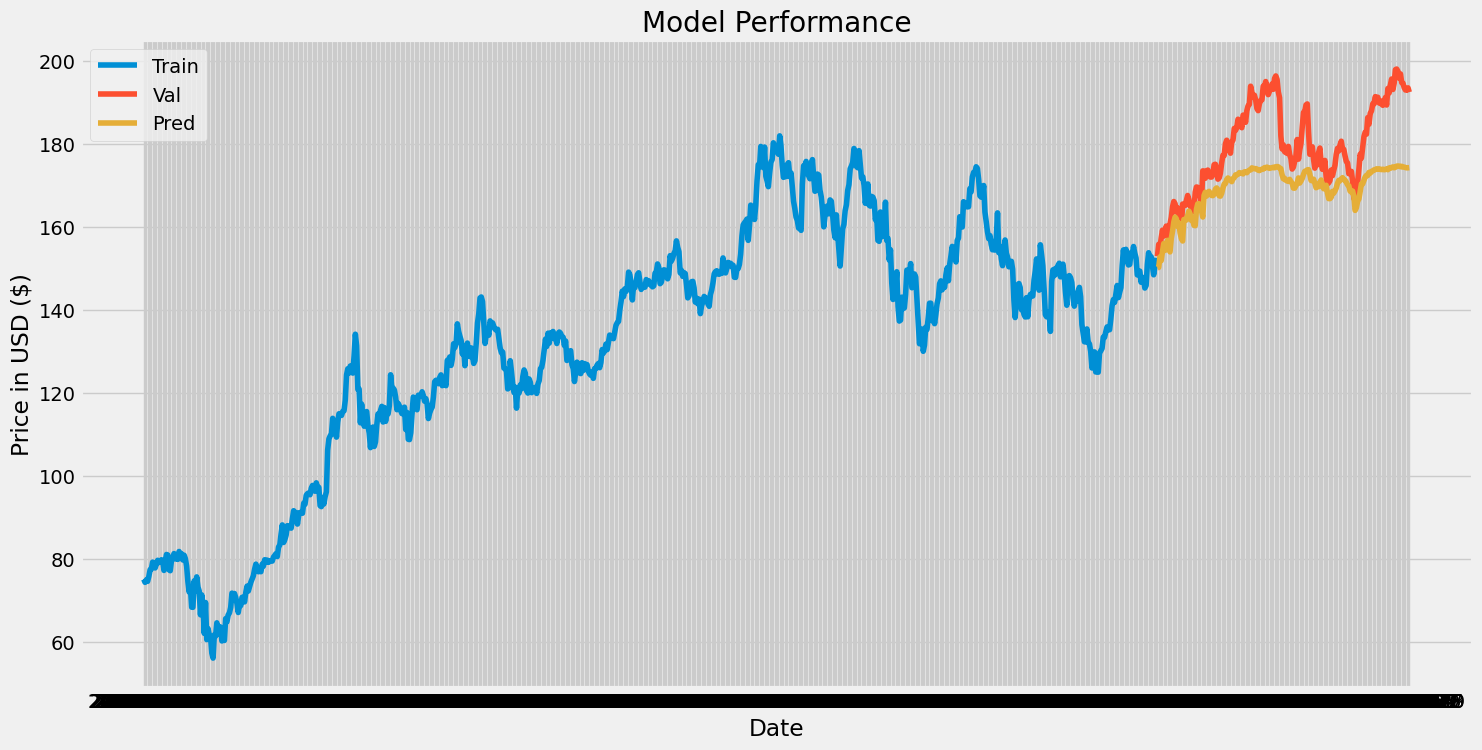

In [379]:
# Plot the data

train = data[:training_data_lenght]
valid = data[training_data_lenght:]
valid['Predictions'] =predictions

## Visualize the model

plt.figure(figsize = (16,8))
plt.title('Model Performance')
plt.xlabel('Date')
plt.ylabel('Price in USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Pred'])
plt.show()

In [381]:
valid

,Close,Predictions
Date,,
2023-03-15,152.990005,150.156815
2023-03-16,155.850006,150.282928
2023-03-17,155.000000,152.838577
2023-03-20,157.399994,151.929337
2023-03-21,159.279999,154.088699
...,...,...
2023-12-22,193.600006,174.461700
2023-12-26,193.050003,174.360352
2023-12-27,193.149994,174.300934
